# **Binary Classification Problem**

### import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

- **Diabetes Dataset** : This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.
- **Description**: This dataset consists of ten baseline variables, such as age, BMI (Body Mass Index), blood pressure, and six blood serum measurements, for diabetes patients.
- **Purpose**: Commonly used for predicting diabetes progression based on various health-related features.


In [39]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion


In [40]:
Diabetes = pd.read_csv('diabetes.csv')
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Attributes Description:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

# **Data Exploration**

In [41]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
Diabetes.duplicated().sum()

0

In [43]:
Diabetes['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

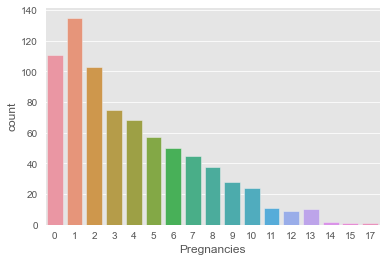

In [44]:
sns.countplot(data = Diabetes ,x='Pregnancies')

- insight: The number of pregnancies gradually decreases

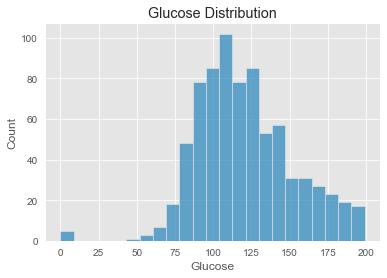

In [45]:
sns.histplot(Diabetes['Glucose']).set_title('Glucose Distribution')
plt.show()


- insight: Glucose is more distributed between 70 and 80

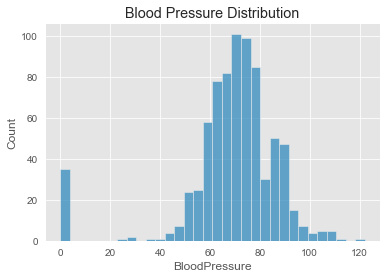

In [46]:
sns.histplot(Diabetes['BloodPressure']).set_title('Blood Pressure Distribution')
plt.show()

- insight: Blood pressure is more distributed between 70 and 80 mm Hg

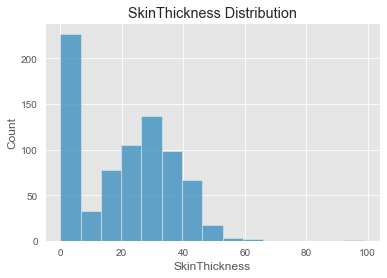

In [47]:
sns.histplot(Diabetes['SkinThickness']).set_title('SkinThickness Distribution')
plt.show()

- insight: SkinThickness is more distributed between 0 and 50 mm

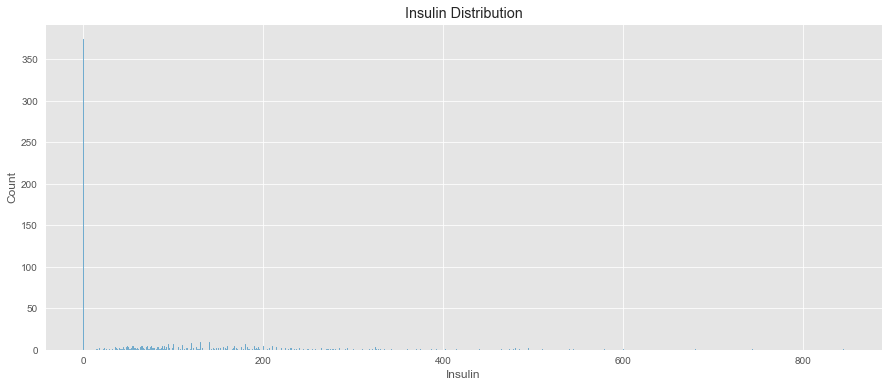

In [48]:
plt.figure(figsize=(15,6))
sns.histplot(Diabetes['Insulin'],binwidth=1).set_title('Insulin Distribution')
plt.show()

- insight: Insulin is normal distributed between 0 and 1 mu U/ml

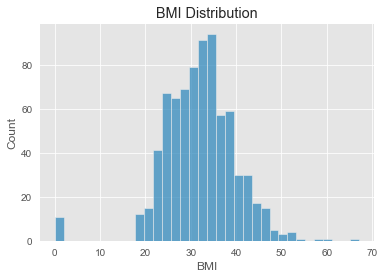

In [49]:
sns.histplot(Diabetes['BMI']).set_title('BMI Distribution')
plt.show()

- insight: BMI is more distributed between 25 and 40 kg/(height in m)^2


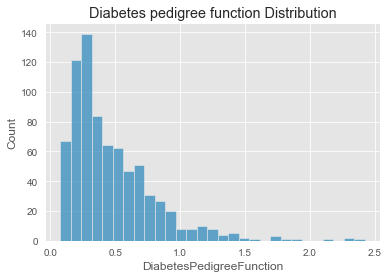

In [50]:
sns.histplot(Diabetes['DiabetesPedigreeFunction']).set_title('Diabetes pedigree function Distribution')
plt.show()

- insight: Diabetes pedigree function is more distributed between 0.1 and 0.8


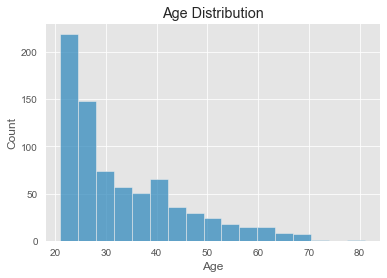

In [51]:
sns.histplot(Diabetes['Age']).set_title('Age Distribution')
plt.show()

- insight: Age is more distributed between 22 and 28

In [52]:
Diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

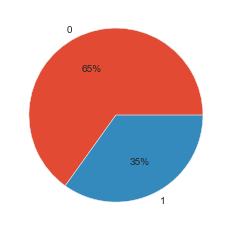

In [53]:
plt.pie(Diabetes['Outcome'].value_counts() , autopct='%.0f%%', labels=[0,1])
plt.show()

- insight: (Does not have diabetes) 0 is more than 1 (have diabetes)


### comparing each feature with the dependent feature

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

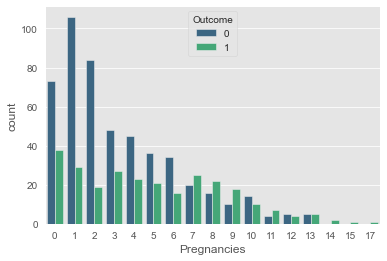

In [54]:
sns.countplot(data=Diabetes, x='Pregnancies', hue='Outcome', palette='viridis')

- insight: **After 7 time pregnancies** number of patient has **diabtic is more**

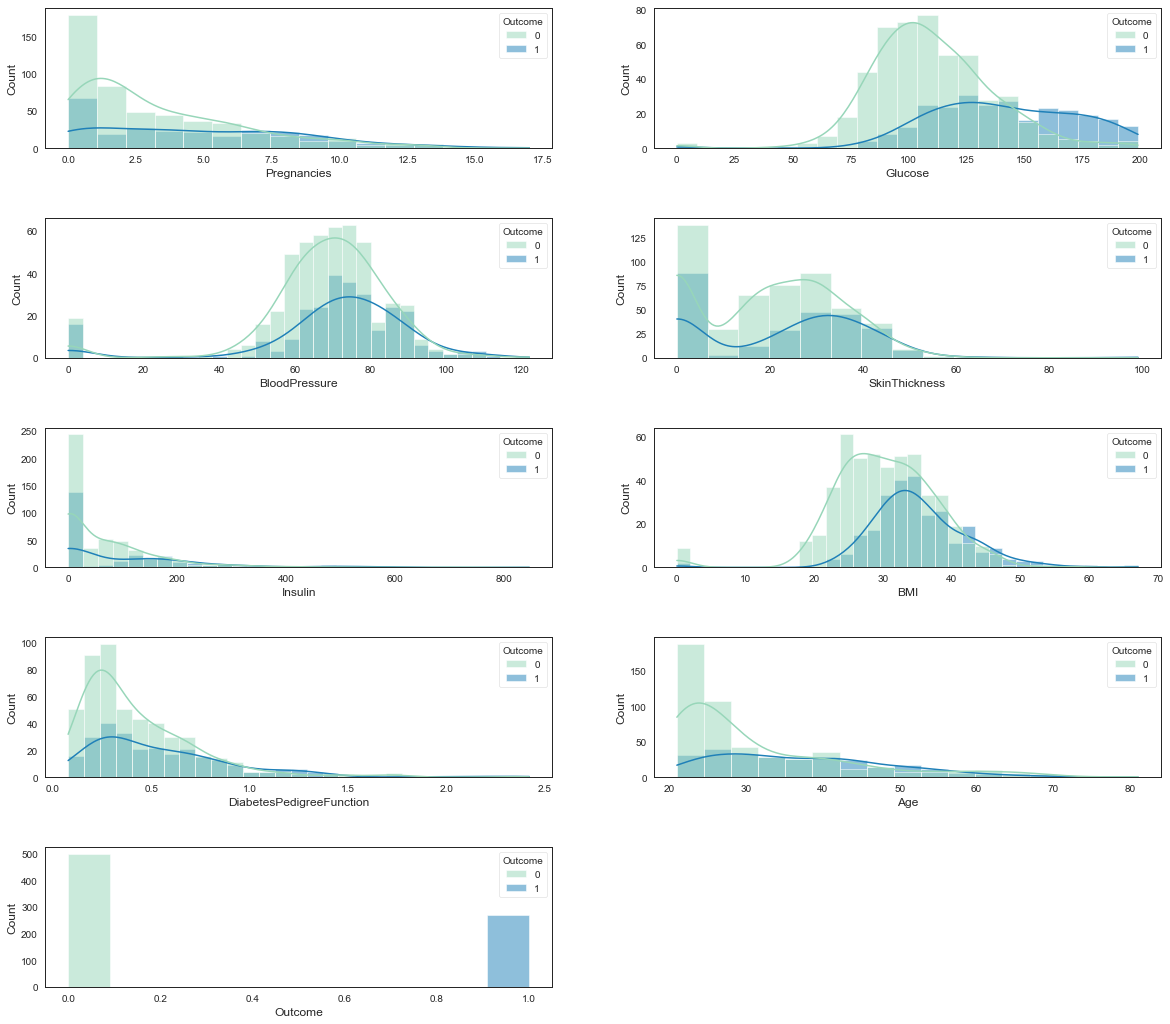

In [55]:
plt.figure(figsize=(20,18))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in Diabetes.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=Diabetes, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

### summary insights :
- Glucose levels are higher for patients has diabetes
- Insulin levels are higher for patients has diabetes
- Diabetes pedigree function are higher for patients has diabetes
- The older you are, the more likely you are to be positive

### correlation between each attributes

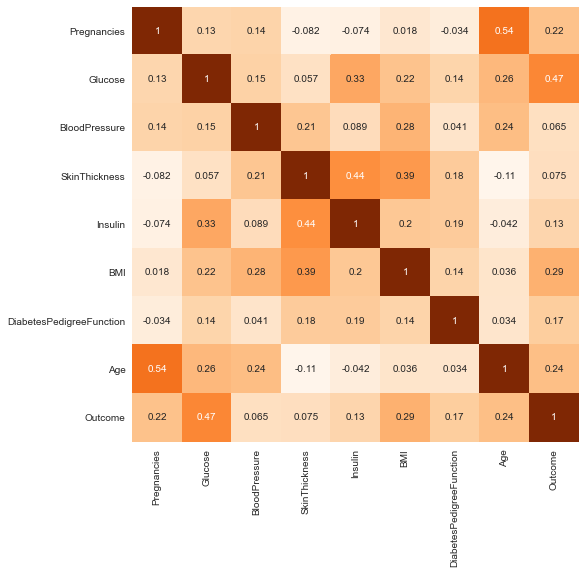

In [56]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(Diabetes.corr(), annot=True,cmap='Oranges',cbar=False)

- there is no high correlation between any feature and other

# **Data Preprocessing**

### Split data to train and validation

In [57]:
from sklearn.model_selection import train_test_split

y = Diabetes["Outcome"]
x = Diabetes.drop("Outcome",axis=1)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### over sampling

In [58]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

smote = SMOTE(random_state=0)
x_train , y_train = smote.fit_resample(x_train,y_train)

x_train.shape,y_train.shape

((802, 8), (802,))

### create new features

In [59]:
# According to BMI, some ranges were determined and categorical variables were assigned.
def set_BMI(row):
    if row["BMI"] < 18.5:
        return "Underweight"
    elif row["BMI"] > 18.5 and row["BMI"] <= 24.9:
        return "Normal"
    elif row["BMI"] > 24.9 and row["BMI"] <= 29.9:
        return "Overweight"
    elif row["BMI"] > 29.9 and row["BMI"] <= 34.9:
        return "Obesity 1"
    elif row["BMI"] > 34.9 and row["BMI"] <= 39.9:
        return "Obesity 2"
    else:
        return "Obesity 3"

x_train["NewBMI"] = x_train.apply(set_BMI, axis=1)
x_test["NewBMI"] = x_test.apply(set_BMI, axis=1)

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI
0,2,84,0,0,0,0.0,0.304,21,Underweight
1,9,112,82,24,0,28.2,1.282,50,Overweight
2,1,139,46,19,83,28.7,0.654,22,Overweight
3,0,161,50,0,0,21.9,0.254,65,Normal
4,6,134,80,37,370,46.2,0.238,46,Obesity 3


In [60]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

x_train["NewInsulinScore"] = x_train.apply(set_insulin, axis=1)
x_test["NewInsulinScore"] = x_test.apply(set_insulin, axis=1)

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI,NewInsulinScore
0,2,84,0,0,0,0.0,0.304,21,Underweight,Abnormal
1,9,112,82,24,0,28.2,1.282,50,Overweight,Abnormal
2,1,139,46,19,83,28.7,0.654,22,Overweight,Normal
3,0,161,50,0,0,21.9,0.254,65,Normal,Abnormal
4,6,134,80,37,370,46.2,0.238,46,Obesity 3,Abnormal


In [61]:
def set_Glucose(row):
    if row["Glucose"] < 140:
        return "Normal"
    elif row["Glucose"] >= 140 and row["Glucose"] <= 199:
        return "prediabetes"
    else:
        return "High"

x_train["NewGlucose"] = x_train.apply(set_Glucose, axis=1)
x_test["NewGlucose"] = x_test.apply(set_Glucose, axis=1)

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI,NewInsulinScore,NewGlucose
0,2,84,0,0,0,0.0,0.304,21,Underweight,Abnormal,Normal
1,9,112,82,24,0,28.2,1.282,50,Overweight,Abnormal,Normal
2,1,139,46,19,83,28.7,0.654,22,Overweight,Normal,Normal
3,0,161,50,0,0,21.9,0.254,65,Normal,Abnormal,prediabetes
4,6,134,80,37,370,46.2,0.238,46,Obesity 3,Abnormal,Normal


### One Hot Encoding

In [62]:
x_train = pd.get_dummies(x_train, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)
x_test = pd.get_dummies(x_test, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_prediabetes
668,6,98,58,33,190,34.0,0.430,43,1,0,0,0,0,0,0
324,2,112,75,32,0,35.7,0.148,21,0,1,0,0,0,0,0
624,2,108,64,0,0,30.8,0.158,21,1,0,0,0,0,0,0
690,8,107,80,0,0,24.6,0.856,34,0,0,0,0,0,0,0
473,7,136,90,0,0,29.9,0.210,50,0,0,0,1,0,0,0


### Scaling by StandardScaler

In [63]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train_scale = scaler.fit_transform(x_train.loc[:,'Pregnancies':'Age'])
# x_test_scale = scaler.transform(x_test.loc[:,'Pregnancies':'Age'])

# #categorical_columns = ['NewBMI_Obesity 1','NewBMI_Obesity 2','NewBMI_Obesity 3','NewBMI_Overweight','NewBMI_Underweight','NewInsulinScore_Normal','NewGlucose_prediabetes']

In [64]:
# x_train_scale = pd.DataFrame(x_train_scale)
# x_test_scale = pd.DataFrame(x_test_scale)
x_test.reset_index(inplace = True)
x_test.drop('index',axis=1,inplace=True)
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_prediabetes
0,6,98,58,33,190,34.0,0.430,43,1,0,0,0,0,0,0
1,2,112,75,32,0,35.7,0.148,21,0,1,0,0,0,0,0
2,2,108,64,0,0,30.8,0.158,21,1,0,0,0,0,0,0
3,8,107,80,0,0,24.6,0.856,34,0,0,0,0,0,0,0
4,7,136,90,0,0,29.9,0.210,50,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,9,165,88,0,0,30.4,0.302,49,1,0,0,0,0,0,1
150,1,77,56,30,56,33.3,1.251,24,1,0,0,0,0,1,0
151,8,95,72,0,0,36.8,0.485,57,0,1,0,0,0,0,0
152,2,146,70,38,360,28.0,0.337,29,0,0,0,1,0,0,1


In [65]:
# X_train = pd.concat([x_train_scale,x_train.loc[:,'NewBMI_Obesity 1':]],axis=1)
# X_test = pd.concat([x_test_scale,x_test.loc[:,'NewBMI_Obesity 1':]],axis=1)
# X_test

In [66]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               802 non-null    int64  
 1   Glucose                   802 non-null    int64  
 2   BloodPressure             802 non-null    int64  
 3   SkinThickness             802 non-null    int64  
 4   Insulin                   802 non-null    int64  
 5   BMI                       802 non-null    float64
 6   DiabetesPedigreeFunction  802 non-null    float64
 7   Age                       802 non-null    int64  
 8   NewBMI_Obesity 1          802 non-null    uint8  
 9   NewBMI_Obesity 2          802 non-null    uint8  
 10  NewBMI_Obesity 3          802 non-null    uint8  
 11  NewBMI_Overweight         802 non-null    uint8  
 12  NewBMI_Underweight        802 non-null    uint8  
 13  NewInsulinScore_Normal    802 non-null    uint8  
 14  NewGlucose

###handling outliers using (Log Transformation & Winsorizing)


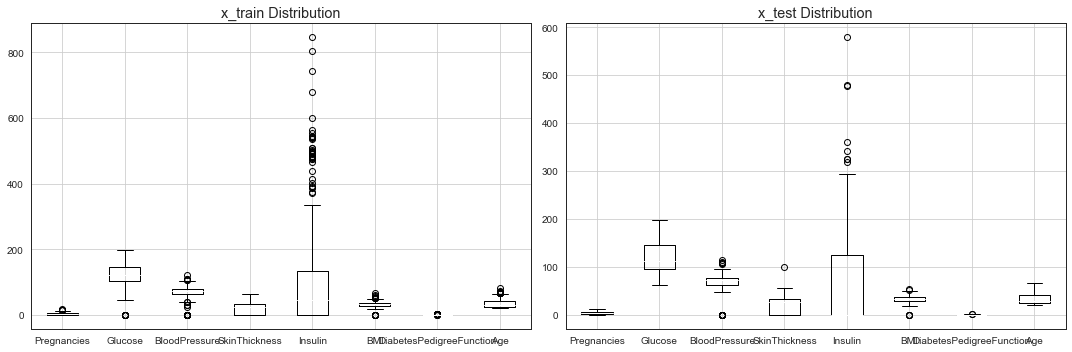

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

x_train.loc[:,'Pregnancies':'Age'].boxplot(ax=axes[0])
axes[0].set_title('x_train Distribution')

x_test.loc[:,'Pregnancies':'Age'].boxplot(ax=axes[1])
axes[1].set_title('x_test Distribution')

plt.tight_layout()
plt.show()

In [68]:
from scipy.stats.mstats import winsorize

for column_name in x_train.columns[:8]:

  x_train[column_name] = np.log1p(x_train[column_name])
  x_train[column_name] = winsorize(x_train[column_name], limits=[0.05, 0.05])

  x_test[column_name] = np.log1p(x_test[column_name])
  x_test[column_name] = winsorize(x_test[column_name], limits=[0.05, 0.05])

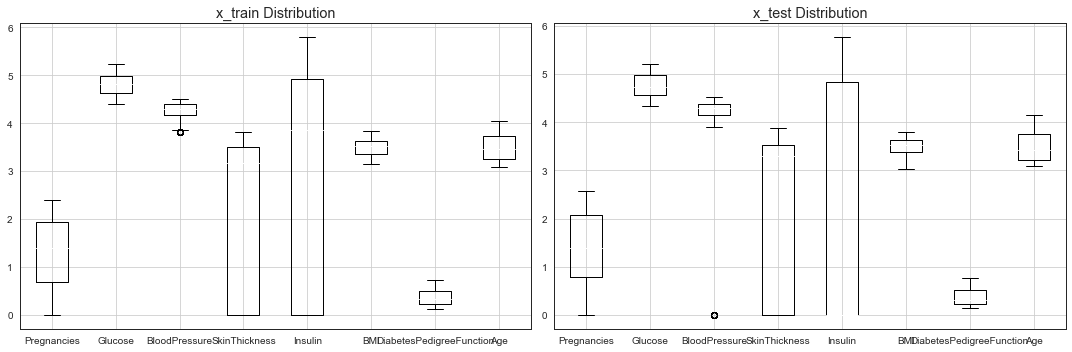

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

x_train.loc[:,'Pregnancies':'Age'].boxplot(ax=axes[0])
axes[0].set_title('x_train Distribution')

x_test.loc[:,'Pregnancies':'Age'].boxplot(ax=axes[1])
axes[1].set_title('x_test Distribution')

plt.tight_layout()
plt.show()

In [70]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               802 non-null    float64
 1   Glucose                   802 non-null    float64
 2   BloodPressure             802 non-null    float64
 3   SkinThickness             802 non-null    float64
 4   Insulin                   802 non-null    float64
 5   BMI                       802 non-null    float64
 6   DiabetesPedigreeFunction  802 non-null    float64
 7   Age                       802 non-null    float64
 8   NewBMI_Obesity 1          802 non-null    uint8  
 9   NewBMI_Obesity 2          802 non-null    uint8  
 10  NewBMI_Obesity 3          802 non-null    uint8  
 11  NewBMI_Overweight         802 non-null    uint8  
 12  NewBMI_Underweight        802 non-null    uint8  
 13  NewInsulinScore_Normal    802 non-null    uint8  
 14  NewGlucose

# **Build Model**

### KNeighborsClassifier

In [222]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(x_train,y_train)
y_pred = KNN_model.predict(x_test)

In [223]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.6623376623376623, 0.7090909090909091, 0.52, 0.6000000000000001)

<Axes: >

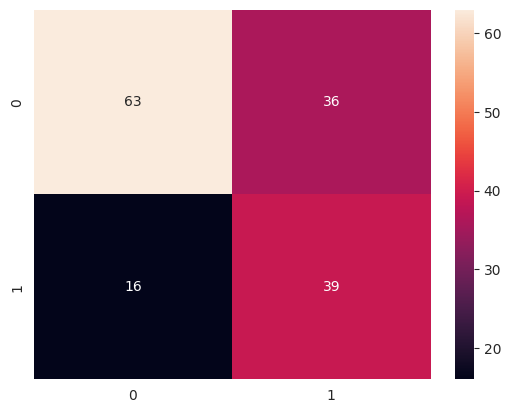

In [224]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

### xgboost model

In [225]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(x_train,y_train)
y_pred = XGB_model.predict(x_test)

In [226]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7337662337662337, 0.7636363636363637, 0.6, 0.6719999999999999)

<Axes: >

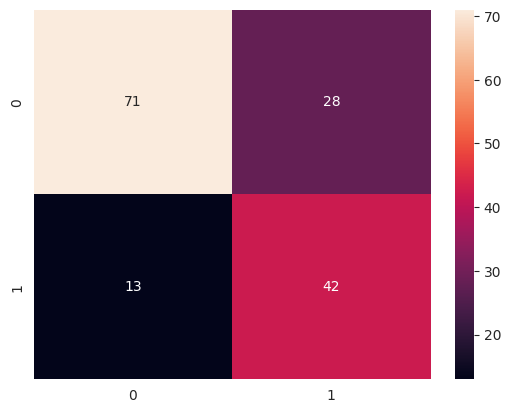

In [227]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

### Random Forest Classifier model

In [228]:
from sklearn.ensemble import RandomForestClassifier
RD_model = RandomForestClassifier()
RD_model.fit(x_train,y_train)
y_pred = RD_model.predict(x_test)

In [229]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7597402597402597,
 0.7818181818181819,
 0.6323529411764706,
 0.6991869918699187)

<Axes: >

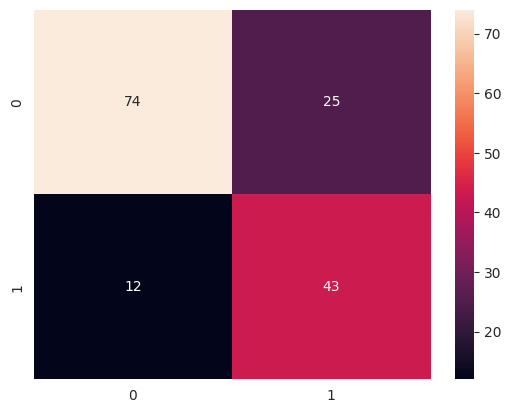

In [230]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

### BaggingClassifier

In [231]:
from sklearn.ensemble import BaggingClassifier
BG_model = BaggingClassifier()
BG_model.fit(x_train,y_train)
y_pred = BG_model.predict(x_test)

<Axes: >

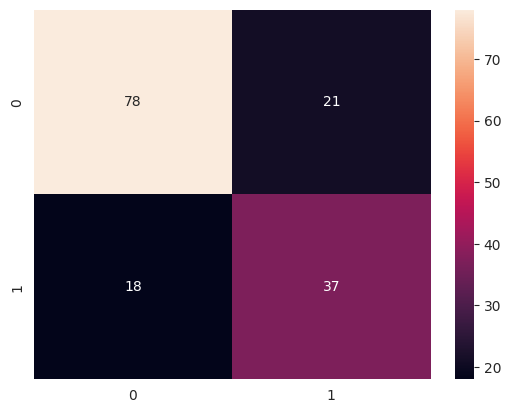

In [232]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

In [233]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7467532467532467,
 0.6727272727272727,
 0.6379310344827587,
 0.6548672566371682)

### Extra Trees Classifier

In [234]:
from sklearn.ensemble import ExtraTreesClassifier

EX_model = ExtraTreesClassifier()
EX_model.fit(x_train,y_train)
y_pred = EX_model.predict(x_test)

<Axes: >

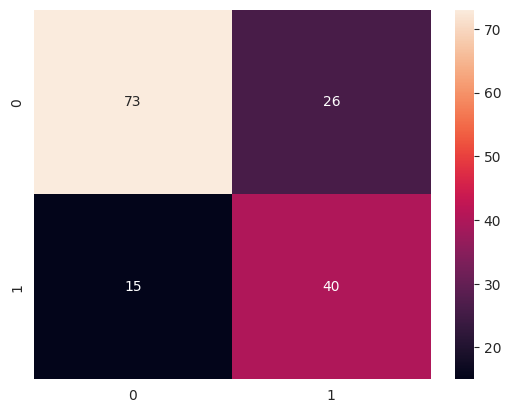

In [235]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

In [236]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7337662337662337,
 0.7272727272727273,
 0.6060606060606061,
 0.6611570247933883)

# Hyperparameter Tuning

In [237]:
# #!pip install --quiet optuna
# import optuna

# def objective(trial):
#     # Define the hyperparameter search space
#     n_estimators = trial.suggest_int('n_estimators', 50, 200)
#     random_state = trial.suggest_int('random_state', 1, 200)
#     max_depth = trial.suggest_int('max_depth', 5, 30)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
#     max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

#     # Create and train the Random Forest model with the suggested hyperparameters
#     rf_model = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         random_state=random_state
#     )
#     rf_model.fit(x_train, y_train)

#     # Predict on the test set
#     y_pred = rf_model.predict(x_test)

#     # Evaluate accuracy
#     accuracy = accuracy_score(y_test, y_pred)

#     return accuracy

# # Set up the Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1000)

# # Get the best hyperparameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

# # Train the model with the best hyperparameters
# best_rf_model = RandomForestClassifier(
#     n_estimators=best_params['n_estimators'],
#     max_depth=best_params['max_depth'],
#     min_samples_split=best_params['min_samples_split'],
#     min_samples_leaf=best_params['min_samples_leaf'],
#     max_features=best_params['max_features'],
#     random_state=42
# )
# best_rf_model.fit(x_train, y_train)

# # Predict on the test set
# y_pred = best_rf_model.predict(x_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on Test Set:", accuracy)

# **Best Model With Best Hyperparameter**

In [238]:
rf_model = RandomForestClassifier(
        n_estimators=134,
        max_depth=24,
        min_samples_split=4,
        min_samples_leaf=3,
        max_features='auto',
        random_state=42
    )
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

<Axes: >

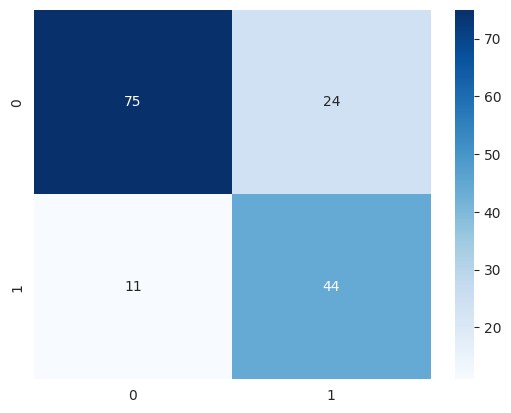

In [239]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True,cmap='Blues')

In [240]:
# # !pip install --quiet optuna
# import optuna
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# def objective(trial):
#     params = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'booster': 'gbtree',
#         'verbosity': 0,
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 0.0, 1.0),
#     }

#     model = xgb.XGBClassifier(**params, random_state=42)
#     model.fit(x_train, y_train)

#     y_pred = model.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     return accuracy

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1000)

# print('Number of finished trials: ', len(study.trials))
# print('Best trial:')
# trial = study.best_trial

# print('Accuracy: {}'.format(trial.value))
# print("Best hyperparameters: {}".format(trial.params))

In [241]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=137,
    learning_rate= 0.02192494239448011,
    max_depth=10,
    subsample = 0.6293864042823004,
    colsample_bytree= 0.5305263839158708,
    min_child_weight= 4,
    gamma= 0.838477845515702,
    random_state=42
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<Axes: >

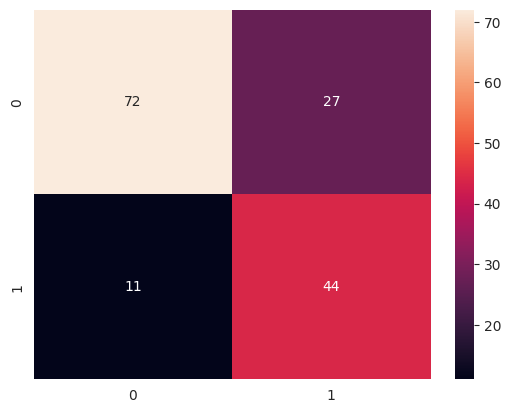

In [242]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

In [243]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

accuracy,recall,precision,f1score

(0.7532467532467533, 0.8, 0.6197183098591549, 0.6984126984126985)

In [244]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_models = [
    ('rf', RandomForestClassifier(
        n_estimators=134,
        max_depth=24,
        min_samples_split=4,
        min_samples_leaf=3,
        max_features='auto',
        random_state=42
    )),
    ('xgb', xgb.XGBClassifier(
    n_estimators=137,
    learning_rate= 0.02192494239448011,
    max_depth=10,
    subsample = 0.6293864042823004,
    colsample_bytree= 0.5305263839158708,
    min_child_weight= 4,
    gamma= 0.838477845515702,
    random_state=42
))
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(x_train, y_train)
y_pred = stacking_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


<Axes: >

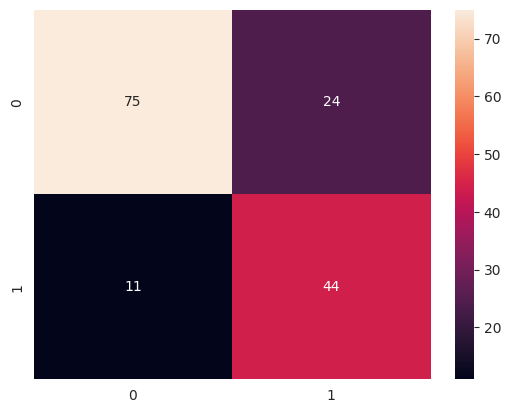

In [245]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)

In [246]:
# #!pip install --quiet optuna
# import optuna
# from sklearn.ensemble import BaggingClassifier
# from sklearn.metrics import accuracy_score

# def objective(trial):
#     # Define hyperparameters to tune
#     n_estimators = trial.suggest_int('n_estimators', 1, 200)
#     random_state = trial.suggest_int('random_state', 1, 200)
#     max_samples = trial.suggest_float('max_samples', 0.1, 1.0)
#     max_features = trial.suggest_float('max_features', 0.1, 1.0)

#     # Create a BaggingClassifier with the suggested hyperparameters
#     model = BaggingClassifier(
#         n_estimators=n_estimators,
#         max_samples=max_samples,
#         max_features=max_features,
#         random_state=42
#     )

#     # Train the model
#     model.fit(x_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(x_test)

#     # Calculate accuracy for optimization (you can replace this with another metric)
#     accuracy = accuracy_score(y_test, y_pred)

#     return accuracy

# # Create the Optuna study
# study = optuna.create_study(direction='maximize')

# # Perform optimization
# study.optimize(objective, n_trials=1000)

# # Print the best hyperparameters and corresponding accuracy
# print("Best Parameters: ", study.best_params)
# print("Best Accuracy: ", study.best_value)


In [247]:
from sklearn.ensemble import BaggingClassifier
BG_model = BaggingClassifier(n_estimators= 185, max_samples= 0.7960146567333504, max_features = 0.8010470328468465,random_state=42)
BG_model.fit(x_train,y_train)
y_pred = BG_model.predict(x_test)

<Axes: >

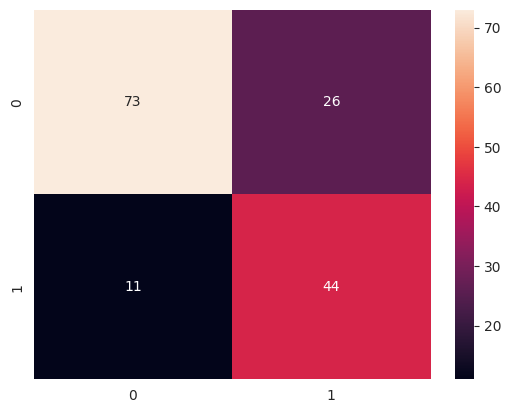

In [248]:
from sklearn.metrics import confusion_matrix
Confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(Confusion_matrix,annot=True)